In [2]:
import gwpopulation
from gwpopulation.models.redshift import PowerLawRedshift
from bilby.core.result import read_in_result
from scipy.interpolate import interp1d
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt

In [3]:
PP_path = '../GWTC-3-population-data/analyses/PowerLawPeak/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_result.json'
PP_result = read_in_result(PP_path)

In [4]:
print("run label: ", PP_result.label)
print("log10 BF: ", PP_result.log_10_bayes_factor) # note that this will not always be the same BF that is quoted in the text because some corrections are necessary to compare these between models
print("\n", "hyper-priors:")
PP_result.priors

run label:  o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift
log10 BF:  38.58338391077907

 hyper-priors:


{'alpha': Uniform(minimum=-4, maximum=12, name='alpha', latex_label='$\\alpha$', unit=None, boundary=None),
 'beta': Uniform(minimum=-2, maximum=7, name='beta', latex_label='$\\beta_{q}$', unit=None, boundary=None),
 'mmax': Uniform(minimum=30, maximum=100, name='mmax', latex_label='$m_{\\max}$', unit=None, boundary=None),
 'mmin': Uniform(minimum=2, maximum=10, name='mmin', latex_label='$m_{\\min}$', unit=None, boundary=None),
 'lam': Uniform(minimum=0, maximum=1, name='lambda', latex_label='$\\lambda_{m}$', unit=None, boundary=None),
 'mpp': Uniform(minimum=20, maximum=50, name='mpp', latex_label='$\\mu_{m}$', unit=None, boundary=None),
 'sigpp': Uniform(minimum=1, maximum=10, name='sigpp', latex_label='$\\sigma_{m}$', unit=None, boundary=None),
 'delta_m': Uniform(minimum=0, maximum=10, name='delta_m', latex_label='$\\delta_{m}$', unit=None, boundary='reflective'),
 'amax': DeltaFunction(peak=1.0, name=None, latex_label=None, unit=None),
 'mu_chi': Uniform(minimum=0, maximum=1, name

In [5]:
PP_hyperposterior_samples = PP_result.posterior.copy() # making a copy is best practice here so you don't accidentally modify things in-place
PP_hyperposterior_samples

,alpha,beta,mmax,mmin,lam,mpp,sigpp,delta_m,mu_chi,sigma_chi,...,lamb,amax,log_likelihood,log_prior,selection,pdet_n_effective,surveyed_hypervolume,log_10_rate,rate,min_event_n_effective
0,3.476035,1.192781,91.137635,3.335027,0.045152,32.019619,7.361617,5.502380,0.430299,0.037676,...,0.593878,1.0,86.219165,-20.158271,0.001980,5600.884717,1102.923927,1.539321,34.619495,184.210871
1,2.843807,0.551632,92.336309,3.455594,0.099132,21.146326,9.635711,3.504334,0.229716,0.027052,...,3.899003,1.0,88.795439,-20.158271,0.000176,7628.305892,24548.963167,1.203419,15.974191,91.831207
2,4.127894,1.910420,99.382743,4.114949,0.058528,26.304442,9.105968,4.430823,0.297703,0.036759,...,-0.096742,1.0,89.598445,-20.158271,0.002577,4734.966457,617.064144,1.681428,48.020645,94.982019
3,4.512565,1.291055,98.845047,2.963035,0.007879,32.267134,9.914114,9.800366,0.378698,0.052658,...,3.511903,1.0,90.035214,-20.158271,0.000295,5654.797132,16703.390755,1.146385,14.008291,289.936772
4,2.772482,0.149371,94.491001,5.138160,0.035747,30.469008,8.569162,3.361789,0.336149,0.034270,...,2.514446,1.0,90.339131,-20.158271,0.000582,8247.427572,6336.065138,1.302851,20.084052,261.964627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,3.388853,1.075150,89.768520,4.684262,0.030388,35.727936,3.478996,5.246642,0.244086,0.027675,...,2.733047,1.0,107.871029,-20.158271,0.000525,3796.539977,7811.787060,1.235183,17.186329,71.639539
11180,3.684463,1.539779,81.785901,5.327478,0.030328,34.102957,3.505780,5.133147,0.251205,0.033394,...,3.171738,1.0,107.877236,-20.158271,0.000377,4006.532961,11954.783380,1.175202,14.969305,72.109121
11181,3.684463,1.539779,81.785901,5.327478,0.030328,34.102957,3.505780,5.133147,0.251205,0.033394,...,3.171738,1.0,107.877236,-20.158271,0.000377,4006.532961,11954.783380,1.169904,14.787819,72.109121
11182,3.573136,0.627634,88.689645,5.303211,0.029184,34.600418,3.531467,4.342366,0.229689,0.032670,...,3.456785,1.0,107.909312,-20.158271,0.000266,3745.787380,15818.169705,1.239911,17.374440,73.194989


In [6]:
PP_hyperposterior_samples.keys()

Index(['alpha', 'beta', 'mmax', 'mmin', 'lam', 'mpp', 'sigpp', 'delta_m',
       'mu_chi', 'sigma_chi', 'xi_spin', 'sigma_spin', 'lamb', 'amax',
       'log_likelihood', 'log_prior', 'selection', 'pdet_n_effective',
       'surveyed_hypervolume', 'log_10_rate', 'rate', 'min_event_n_effective'],
      dtype='object')

In [22]:
PP_hyperposterior_samples.iloc[7900]

alpha                       3.020960
beta                        0.394812
mmax                       82.479263
mmin                        5.679884
lam                         0.078118
mpp                        36.895852
sigpp                       4.241245
delta_m                     3.358819
mu_chi                      0.236135
sigma_chi                   0.025766
xi_spin                     0.810682
sigma_spin                  1.170726
lamb                        0.767141
amax                        1.000000
log_likelihood            103.451589
log_prior                 -20.158271
selection                   0.002360
pdet_n_effective         4127.492583
surveyed_hypervolume     1281.521012
log_10_rate                 1.278316
rate                       18.980861
min_event_n_effective      90.606445
Name: 7900, dtype: float64

In [8]:
def gen_PLPP_model(mass, q, hyperpost_samp):
    """
    Returns gwpopulation.models.mass.SinglePeakSmoothedMassDistribution from array of massesand  hyperposterior sample in 
    form of pandas data frame.
    Posterior samples should have keys:
    ['alpha', 'beta', 'mmax', 'mmin', 'lam', 'mpp', 'sigpp', 'delta_m',
       'mu_chi', 'sigma_chi', 'xi_spin', 'sigma_spin', 'lamb', 'amax',
       'log_likelihood', 'log_prior', 'selection', 'pdet_n_effective',
       'surveyed_hypervolume', 'log_10_rate', 'rate', 'min_event_n_effective']
    """
    param_dict = {'mass_1':mass, 'mass_ratio':q}

    alpha = hyperpost_samp['alpha']
    beta = hyperpost_samp['beta']
    mmin = hyperpost_samp['mmin']
    mmax = hyperpost_samp['mmax']
    lam = hyperpost_samp['lam']
    mpp = hyperpost_samp['mpp']
    sigpp = hyperpost_samp['sigpp']
    break_fraction = hyperpost_samp['delta_m']

    return gwpopulation.models.mass.two_component_single(mass, alpha, mmin, mmax, lam, \
        mpp, sigpp)


In [15]:
masses= np.linspace(2.,100.,1000)
qs= np.linspace(0.,1.,10000)
PLPP = gen_PLPP_model(masses, qs, PP_hyperposterior_samples.iloc[7900])

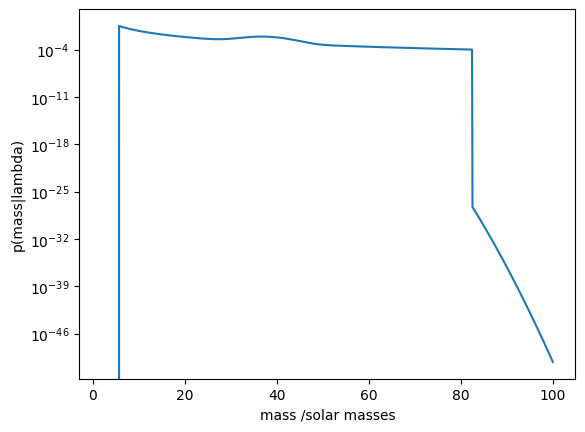

In [16]:
plt.plot(masses, PLPP)
plt.xlabel('mass /solar masses')
plt.ylabel('p(mass|lambda)')
plt.yscale('log')

In [10]:
def gen_mass_model(mass, q, hyperpost_samp):
    """
    Returns gwpopulation.models.mass.SinglePeakSmoothedMassDistribution from array of massesand  hyperposterior sample in 
    form of pandas data frame.
    Posterior samples should have keys:
    ['alpha', 'beta', 'mmax', 'mmin', 'lam', 'mpp', 'sigpp', 'delta_m',
       'mu_chi', 'sigma_chi', 'xi_spin', 'sigma_spin', 'lamb', 'amax',
       'log_likelihood', 'log_prior', 'selection', 'pdet_n_effective',
       'surveyed_hypervolume', 'log_10_rate', 'rate', 'min_event_n_effective']
    """
    param_dict = {'mass_1':mass, 'mass_ratio':q}

    alpha = hyperpost_samp['alpha']
    beta = hyperpost_samp['beta']
    mmin = hyperpost_samp['mmin']
    mmax = hyperpost_samp['mmax']
    lam = hyperpost_samp['lam']
    mpp = hyperpost_samp['mpp']
    sigpp = hyperpost_samp['sigpp']
    break_fraction = hyperpost_samp['delta_m']

    mass_model = gwpopulation.models.mass.SinglePeakSmoothedMassDistribution()

    return mass_model.p_m1(param_dict, **{'alpha':alpha, 'mmin':mmin, 'mmax':mmax, 'lam':lam, \
        'mpp':mpp, 'sigpp':sigpp})


In [1]:
masses= np.linspace(2.,100.,1000)
qs= np.linspace(0.,1.,10000)
PLPP = gen_mass_model(masses, qs, PP_hyperposterior_samples.iloc[7900])

NameError: name 'np' is not defined

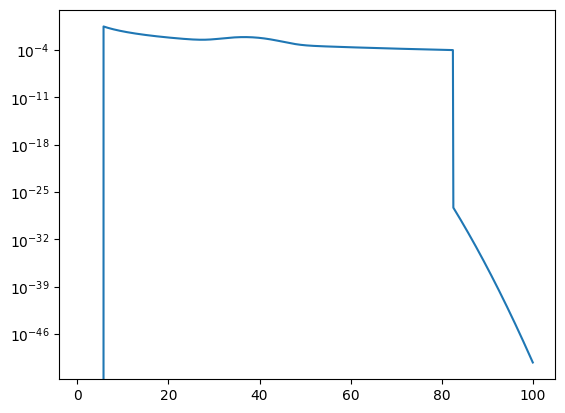

In [13]:
plt.plot(masses, PLPP)
plt.yscale('log')

In [17]:
def gen_q_model(mass, q, hyperpost_samp):
    """
    Returns gwpopulation.models.mass.SinglePeakSmoothedMassDistribution from array of massesand  hyperposterior sample in 
    form of pandas data frame.
    Posterior samples should have keys:
    ['alpha', 'beta', 'mmax', 'mmin', 'lam', 'mpp', 'sigpp', 'delta_m',
       'mu_chi', 'sigma_chi', 'xi_spin', 'sigma_spin', 'lamb', 'amax',
       'log_likelihood', 'log_prior', 'selection', 'pdet_n_effective',
       'surveyed_hypervolume', 'log_10_rate', 'rate', 'min_event_n_effective']
    """
    param_dict = {'mass_1':mass, 'mass_ratio':q}

    beta = hyperpost_samp['beta']
    mmin = hyperpost_samp['mmin']
    break_fraction = hyperpost_samp['delta_m']

    q_model = gwpopulation.models.mass.SinglePeakSmoothedMassDistribution()

    return q_model.p_q(param_dict, beta, mmin, break_fraction)


In [19]:
masses= np.linspace(2.,100.,1000)
qs= np.linspace(0.,1.,1000)
PLQ = gen_q_model(masses, qs, PP_hyperposterior_samples.iloc[7900])

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [33]:
def gen_z_model(z, hyperpost_samp):
    """
    Returns gwpopulation.models.mass.SinglePeakSmoothedMassDistribution from array of massesand  hyperposterior sample in 
    form of pandas data frame.
    Posterior samples should have keys:
    ['alpha', 'beta', 'mmax', 'mmin', 'lam', 'mpp', 'sigpp', 'delta_m',
       'mu_chi', 'sigma_chi', 'xi_spin', 'sigma_spin', 'lamb', 'amax',
       'log_likelihood', 'log_prior', 'selection', 'pdet_n_effective',
       'surveyed_hypervolume', 'log_10_rate', 'rate', 'min_event_n_effective']
    """

    lamb = hyperpost_samp['lamb']
    param_dict = {'z':z, "lamb":lamb}

    z_model = gwpopulation.models.redshift.PowerLawRedshift()

    return z_model.psi_of_z(z)

In [34]:
zs= np.linspace(0.,2.3,1000)
PLZ = gen_z_model(zs, PP_hyperposterior_samples.iloc[7900])

KeyError: 'lamb'